In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from PIL import Image

In [95]:
dataset_dir = '/opt/ml/dataset/'
valset_path = "/opt/ml/dataset/2___val_MultiStfKFold.json"
valinference_path= "/opt/ml/level2_objectdetection-cv-11/eda/submission_best_bbox_mAP_50_epoch_20_val.csv"

with open(valset_path, 'r') as f:
    valset = json.load(f)

inference = pd.read_csv(valinference_path)

In [96]:
def grid_image(image, image_id, bbox_list, class_list):
    colors = ["r", "g", "b", "c", "m", "y", "k", "darkorange", "limegreen", "deepskyblue"] # bbox 색상 리스트
    classes_index = ["General trash", "Paper", "Paper pack", "Metal", "Glass","Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
    fig, axes = plt.subplots(3,4, figsize=(14,12))
    axes = axes.flatten()
    for i in range(len(image)):
        bboxes = bbox_list[i]
        classes = class_list[i]
        axes[i].imshow(image[i])
        axes[i].axis("off")
        axes[i].set_title("index: "+ str(image_id[i])+", num_bbox: " + str(len(bbox_list[i])))
        for _, (bbox, class_id) in enumerate(zip(bboxes, classes)):
            x, y, w, h = bbox
            w, h = int(w), int(h)    
            class_id = int(class_id)    
            # bbox 시각화
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors[class_id], facecolor="none")
            axes[i].add_patch(rect)
            # bbox 라벨 시각화
            label = classes_index[class_id]
            # ax.text(x, y-5, label, fontsize=8, color=colors[class_id], fontweight="bold")
            bbox_props = dict(boxstyle="square,pad=0.3", fc=colors[class_id], ec=colors[class_id], lw=0.3)
            # '''
            # fc 속성을 사용하여 글자 배경 색상을 설정하고,
            # ec 속성을 사용하여 상자 테두리 색상을 설정합니다. 
            # lw 속성을 사용하여 상자 테두리 두께를 설정할 수 있습니다.
            # '''
            axes[i].text(x, y-5, label, fontsize=8, color="w", fontweight="bold", bbox=bbox_props)

    return None

In [97]:
indexes = [i["id"] for i in valset["images"]]
filenames = [i["file_name"] for i in valset["images"]]
annotations = pd.DataFrame(valset["annotations"])

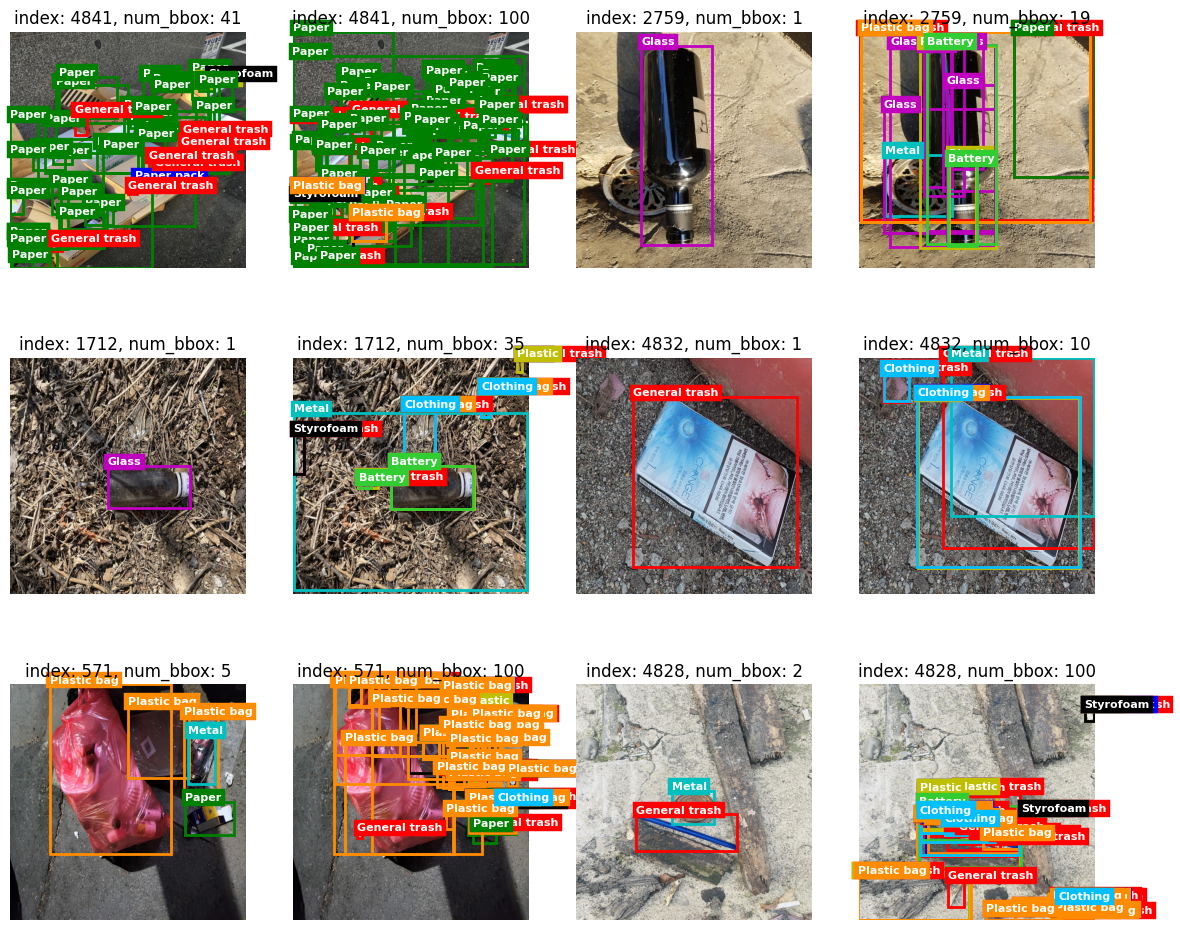

In [101]:
total_bbox=[]
total_class=[]
total_image=[]
total_id=[]
for i in random.sample(range(len(indexes)), 6):       #test image에서 랜덤하게 12개 샘플링
    image_path = filenames[i]
    image = Image.open(dataset_dir+image_path)
    image_id = indexes[i]

    bbox_list = []
    class_list = []
    
    predictions = annotations[annotations["image_id"]==image_id]
    bbox_list = list(predictions["bbox"])
    class_list = list(predictions["category_id"])

    total_image.append(image)
    total_id.append(image_id)
    total_bbox.append(bbox_list)
    total_class.append(class_list)

    bbox_list = []
    class_list = []

    submission_line = inference[inference["image_id"] == "train/"+str(image_id).zfill(4)+".jpg"]["PredictionString"].iloc[0].split()
    for _ in range(len(submission_line)//6):
        class_list.append(submission_line.pop(0))
        submission_line.pop(0)
        bbox_list.append(submission_line.pop(0))
        bbox_list.append(submission_line.pop(0))
        bbox_list.append(submission_line.pop(0))
        bbox_list.append(submission_line.pop(0))
    class_list = np.array(class_list).reshape(-1, 1).astype("int")
    bbox_list = np.array(bbox_list).reshape(-1, 4).astype("float")
    bbox_list[:,2]=bbox_list[:,2]-bbox_list[:,0]
    bbox_list[:,3]=bbox_list[:,3]-bbox_list[:,1]

    total_image.append(image)
    total_id.append(image_id)
    total_bbox.append(bbox_list)
    total_class.append(class_list)
grid_image(total_image, total_id, total_bbox, total_class)

